# Descrição do notebook

# Simulações
- [X] Resultado de percolação em redes complexas de Erdos-Renyi
- [ ] Reproduzir o resultado sobre o efeito de mundo pequeno de Watts e Strogatz .
- [ ] Reproduzir o resultado de resiliência a ataques aleatórios e direcionados de redes com distribuição
de grau livre de escala de Albert, Jeong e Barabási

## Bibliotecas utilizadas

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [16]:
def degree_distribution(G):
  vk = np.array(list(dict(G.degree()).values()))
  max_vk = np.max(vk)
  min_vk = np.min(min)

  # Creating a distribution 
  kvalues = np.arange(0, max_vk+1)
  Pk = np.zeros(max_vk+1)
  for i in vk:
    Pk[i] += 1
  Pk = Pk/sum(Pk)
  return kvalues, Pk

## Percolação em redes complexas (Erdos-Renyi)



In [3]:
# numero de nós no grafo
n = 500 
# Lista de probabilidades p de criação de arestas.
p = np.linspace(0, 0.1, n)

# Lista com tamanho dos maiores componentes
largest_cc = []
start_time = time.time()
# Cria grafo de Erdos-Renyi para cada probabilidade p e
# armazena o valor do maior componente na lista.
for i in range(n):
    # Lista de grafos aleatorios com probabilidade p.
    er = nx.gnp_random_graph(n,p[i])
    # Tamanho do maior componente para cada probabilidade.
    largest_cc.append(len(max(nx.connected_components(er), key=len)))

# total_time = time.time() - start_time
# print("For n = ", n)
# print("--- %s seconds ---" % total_time )

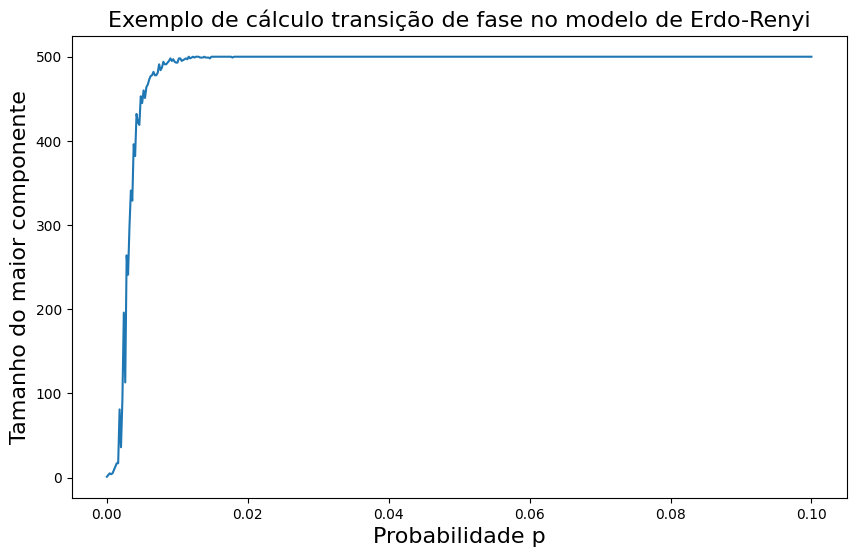

In [4]:
plt.figure(figsize=(10,6))
plt.plot(p, largest_cc)
plt.title("Exemplo de cálculo transição de fase no modelo de Erdo-Renyi", fontsize = 16)
plt.xlabel("Probabilidade p", fontsize = 16)
plt.ylabel("Tamanho do maior componente", fontsize = 16)
plt.show()

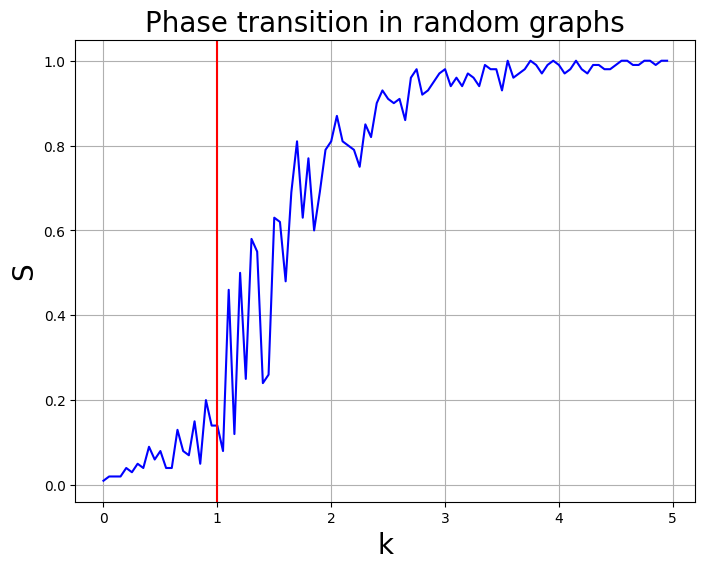

In [14]:

N = 100
S = []
vk = []
for c in np.arange(0, 5, 0.05):
    p = c/(N-1)
    G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    S.append(len(G)/N)
    vk.append(c)
    #print(c, len(G))
plt.figure(figsize=(8,6))
plt.plot(vk,S,'b', label='Largest component size')
plt.xlabel("k", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Phase transition in random graphs", fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show();

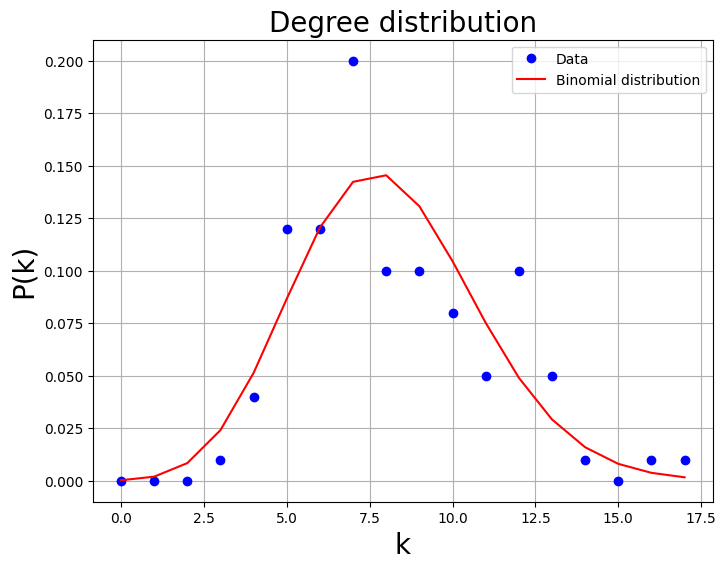

In [17]:
N = 100
av_degree = 8
p = av_degree/(N-1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

ks, Pk = degree_distribution(GER)


plt.figure(figsize=(8,6))
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file

## Fitting of. binomial distribution
from scipy.stats import binom
pk = binom.pmf(ks, N, p)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

## Efeito de mundo pequeno (Strogatz-Watts)

In [5]:
n = 50
k = 6

$$ 
  L_{\text{max}} = \frac{n}{2k} \text{ e } C_{\text{max}} = \frac{3(k-2)}{4(k-1)}
$$

In [6]:
Lmax = n / (2 * k)
Cmax = (3/4) * (k - 2) / (k - 1)

print("Lmax = ", Lmax)
print("Cmax = ", Cmax)

Lmax =  4.166666666666667
Cmax =  0.6


In [7]:
vp = np.linspace(0, 1, n * 3, endpoint = True)
print("len(vp) = ", len(vp))

len(vp) =  150


In [8]:
# vL = []
# vC = []
# i = 0
# for p in vp:
#   g = nx.watts_strogatz_graph(n, k, p)
#   C =  nx.average_clustering(g) / Cmax
#   L = nx.average_shortest_path_length(g) / Lmax
#   vC.append(C)
#   vL.append(L)
#   i+=1
#  print("i = ",  i, " -> C/C(0) = ", C, " L/L(0) = ", L)

In [10]:
# fig, ax = plt.subplots(figsize=(10, 8))
# 
# plt.plot(vp, vL, '-o', color="red", linewidth=3, label = "L(p) / L_max")
# plt.plot(vp, vC, '-s', color="blue", linewidth=3, label = "C(p) / C_max")
# 
# plt.title("Clustering coeficient and average path length in a small world graph", fontsize = 16)
# plt.xlabel("Probability  p", fontsize = 16)
# plt.ylabel("C/C_max and L/L_max", fontsize = 16)
# 
# plt.xscale("log")
# 
# # plt.xlim([0 1.0])
# # plt.ylim([0.0, 1.0])
#  
# plt.legend()
# plt.show()

In [ ]:
# '1# pos = nx.circular_layout(g)
# plt.figure(figsize=(25, 25))
# nx.draw_networkx(g, pos = pos,
#                   node_size = 1000, 
#                  font_size = 20, 
#                  node_color = "green", 
#                  font_color="whitesmoke",  
#                  edge_color = "black",
#                  width = 2)
# plt.show()

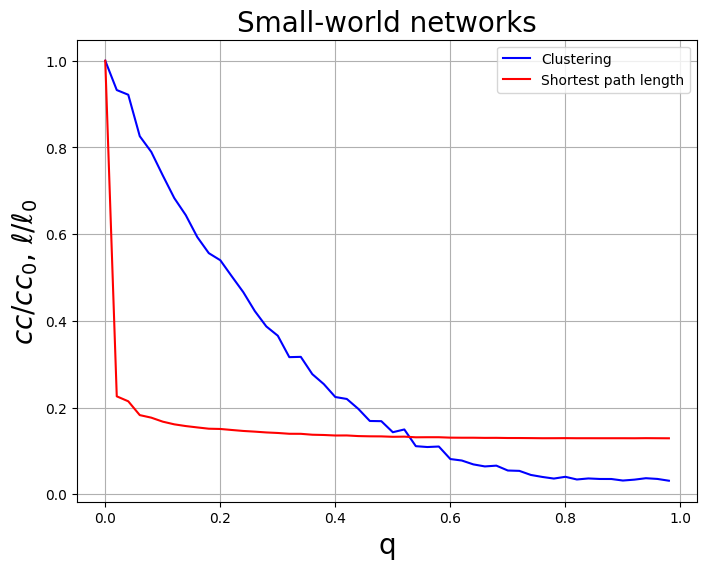

In [12]:
N = 500
av_degree = 12
k = av_degree # int(av_degree/2)
vcc = []
vl = []
vq = []
for q in np.arange(0, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=None)
    cc = nx.average_clustering(G)
    vcc.append(cc)
    l = nx.average_shortest_path_length(G)
    vl.append(l)
    vq.append(q)
plt.figure(figsize=(8,6))
plt.plot(vq,np.array(vcc)/vcc[0],'b', label='Clustering')
plt.plot(vq,np.array(vl)/vl[0],'r', label='Shortest path length')
plt.xlabel("q", fontsize=20)
plt.ylabel("$cc/cc_0$, $\ell/\ell_0$", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.legend()
plt.grid(True)
#plt.savefig('WS.eps') #save the figure into a file
plt.show();

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure(figsize=(8,6))
aux = 0
for q in np.arange(0, 0.6, 0.1): #q is the rewiring probability
    GWS = nx.watts_strogatz_graph(N, k, q, seed=None)
    ks, Pk = degree_distribution(GWS)
    plt.plot(ks,Pk,'o-', color = colors[aux], label = str(q))
    aux = aux + 1
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

In [ ]:
r=nx.degree_assortativity_coefficient(G)
print("Assortativity = ","%3.4f"%r)


In [ ]:
N = 100
S = []
vk = []
for c in arange(0, 5, 0.05):
    p = c/(N-1)
    G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    S.append(len(G)/N)
    vk.append(c)
    #print(c, len(G))
plt.figure(figsize=(8,6))
plt.plot(vk,S,'b', label='Largest component size')
plt.xlabel("k", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Phase transition in random graphs", fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show();


## Resiliência a ataques aleatórios e direcionados (Albert, Barabási e Jeong)

